In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
from skimage import io, color, filters, exposure

def compute_edge_histogram(image):
    grayscale_image = color.rgb2gray(image)
    edge_image = filters.sobel(grayscale_image)
    hist, _ = exposure.histogram(edge_image, nbins=36)
    return hist

def load_images_and_compute_histograms(class_paths):
    images = []
    histograms = []
    labels = []

    for class_path in class_paths:
        class_label = os.path.basename(class_path)

        for filename in os.listdir(class_path):
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(class_path, filename)
                image = io.imread(image_path)
                hist = compute_edge_histogram(image)

                images.append(image)
                histograms.append(hist)
                labels.append(class_label)

    return np.array(images), np.array(histograms), np.array(labels)

class_paths = [
    r"/content/drive/MyDrive/ResizedImages/n02089078-black-and-tan_coonhound",
    r"/content/drive/MyDrive/ResizedImages/n02091831-Saluki",
    r"/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound",
    r"/content/drive/MyDrive/ResizedImages/n02095314-wire-haired_fox_terrier"
]

images, histograms, labels = load_images_and_compute_histograms(class_paths)


In [ ]:
print("Number of images:", len(images))
print("Number of histograms:", len(histograms))
print("Number of labels:", len(labels))

# Display information for the first image
print("First image shape:", images[769].shape)
print("First histogram:", histograms[769])
print("Label for the first image:", labels[769])
print(len(histograms))

Number of images: 1542
Number of histograms: 1542
Number of labels: 1542
First image shape: (128, 128, 3)
First histogram: [3438 2742 1588 1172 1047  984  841  743  631  542  440  401  348  265
  230  191  160  128  106   82   73   51   38   31   24   15   21   11
    8    7    7    9    5    2    2    1]
Label for the first image: n02092002-Scottish_deerhound
1542


In [ ]:
import os
import numpy as np
from skimage import io, color, filters, exposure

# Function to compute the edge histogram of an image
def compute_edge_histogram(image):
    grayscale_image = color.rgb2gray(image)
    edge_image = filters.sobel(grayscale_image)
    hist, _ = exposure.histogram(edge_image, nbins=36)
    return hist

# Function to load images from given class paths and compute histograms
def load_images_and_compute_histograms(class_paths):
    images = []
    histograms = []
    labels = []

    for class_path in class_paths:
        class_label = os.path.basename(class_path)

        for filename in os.listdir(class_path):
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(class_path, filename)
                image = io.imread(image_path)

                # Compute the edge histogram for the current image
                hist = compute_edge_histogram(image)

                images.append(image)
                histograms.append(hist)
                labels.append(class_label)

    # Convert lists to numpy arrays for ease of use
    return np.array(images), np.array(histograms), np.array(labels)

# List of paths for four different classes
class_paths = [
    r"/content/drive/MyDrive/ResizedImages/n02089078-black-and-tan_coonhound",
    r"/content/drive/MyDrive/ResizedImages/n02091831-Saluki",
    r"/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound",
    r"/content/drive/MyDrive/ResizedImages/n02095314-wire-haired_fox_terrier"
]

# Load images and compute histograms
images, edge_histograms, labels = load_images_and_compute_histograms(class_paths)


In [ ]:
import numpy as np

# Assuming 'histograms' is your array of histograms
# Each histogram can be represented as a 1D NumPy array

def standardize_histograms(histograms):
    standardized_histograms = []

    for histogram in histograms:
        mean = np.mean(histogram)
        std = np.std(histogram)

        # Standardize the histogram
        standardized_histogram = (histogram - mean) / std
        standardized_histograms.append(standardized_histogram)

    return standardized_histograms


standardized_histograms = standardize_histograms(histograms)


In [ ]:
print(standardized_histograms)
print(len(standardized_histograms))

[array([ 4.9596141 ,  2.48880191,  1.28224636,  0.65270167,  0.19884388,
       -0.05349073, -0.17836621, -0.19989647, -0.23778972, -0.26620965,
       -0.27912781, -0.28515628, -0.3118538 , -0.31529864, -0.30840896,
       -0.3118538 , -0.31443743, -0.32477195, -0.30065806, -0.32391074,
       -0.31960469, -0.32993921, -0.31960469, -0.33338405, -0.33252284,
       -0.33080042, -0.32563316, -0.33424526, -0.35146947, -0.34285737,
       -0.36438762, -0.36008157, -0.36697125, -0.38161183, -0.3876403 ,
       -0.39022393]), array([ 2.1543259 ,  3.15311772,  2.27049957,  1.9295223 ,  1.44068763,
        1.08764037,  0.79946932,  0.47508829,  0.40417709,  0.15674225,
       -0.02129012, -0.14953379, -0.22949748, -0.32002242, -0.37735488,
       -0.42865235, -0.44977483, -0.49352855, -0.4980548 , -0.54180852,
       -0.56443976, -0.5719835 , -0.60970222, -0.62026347, -0.61121097,
       -0.63384221, -0.65043845, -0.66099969, -0.66552594, -0.67005218,
       -0.68363092, -0.67910468, -0.68212

In [ ]:
print("Number of images:", len(images))
print("Number of histograms:", len(histograms))
print("Number of labels:", len(labels))

# Display information for the first image
print("First image shape:", images[769].shape)
print("First histogram:", histograms[769])
print("Label for the first image:", labels[769])
print(len(histograms))


# Print all edge histograms
for i, histogram in enumerate(edge_histograms):
    print(f"Edge Histogram for image {i + 1}:\n{histogram}\n")

Streaming output truncated to the last 5000 lines.
Edge Histogram for image 543:
[2356 3288 2359 1720 1268 1028  834  647  507  427  352  255  240  209
  162  142  117  100   80   63   61   45   25   29   16   14   12   10
    4    4    2    3    1    1    0    3]

Edge Histogram for image 544:
[3542 4586 2695 1474  919  631  526  383  252  222  180  190  149  117
   93   77   76   63   46   34   29   21   15   12    6    5    9    8
    5    4    1    1    5    3    3    2]

Edge Histogram for image 545:
[2598 3297 2383 1596 1151  789  652  495  436  382  267  227  212  204
  160  149  143  100  119  100  102   99  112  102   93   83   87   73
   53   48   37   20    6    8    0    1]

Edge Histogram for image 546:
[4217 4209 2184 1228  811  653  509  367  298  256  183  165  133  135
  109   94   96   68   72   76   83   69   57   59   48   54   31   36
   18   19   10   10    7    8    4    8]

Edge Histogram for image 547:
[1977 3394 2688 1940 1407 1080  769  687  482  373  304  27

In [ ]:
# Converted the Resized images to edge histograms and stored in edge_histograms variable.
# Checked hist vectors for random images.
# checked the length of edge_histograms.
# Also standardized the edge histograms and stored them in standardized_edge_histogram variable.
import os
import numpy as np
from skimage import io, color, filters, exposure

# Function to compute the edge histogram of an image
def compute_edge_histogram(image):
    grayscale_image = color.rgb2gray(image)
    edge_image = filters.sobel(grayscale_image)
    hist, _ = exposure.histogram(edge_image, nbins=36)
    return hist

# Function to load images from given class paths and compute histograms
def load_images_and_compute_histograms(class_paths):
    images = []
    edge_histograms = []  # Corrected variable name
    labels = []

    for class_path in class_paths:
        class_label = os.path.basename(class_path)

        for filename in os.listdir(class_path):
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(class_path, filename)
                image = io.imread(image_path)

                # Compute the edge histogram for the current image
                hist = compute_edge_histogram(image)

                images.append(image)
                edge_histograms.append(hist)  # Corrected variable name
                labels.append(class_label)

    # Convert lists to numpy arrays for ease of use
    return np.array(images), np.array(edge_histograms), np.array(labels)

# List of paths for four different classes
class_paths = [
    r"/content/drive/MyDrive/ResizedImages/n02089078-black-and-tan_coonhound",
    r"/content/drive/MyDrive/ResizedImages/n02091831-Saluki",
    r"/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound",
    r"/content/drive/MyDrive/ResizedImages/n02095314-wire-haired_fox_terrier"
]

# Load images and compute histograms
images, edge_histograms, labels = load_images_and_compute_histograms(class_paths)

# Display information for the first image
print("Number of images:", len(images))
print("Number of edge histograms:", len(edge_histograms))
print("Number of labels:", len(labels))

# Display information for the first image
print("First image shape:", images[0].shape)
print("First edge histogram:", edge_histograms[0])
print("Label for the first image:", labels[0])
print(len(edge_histograms))


# Print all edge histograms
for i, histogram in enumerate(edge_histograms):
    print(f"Edge Histogram for image {i + 1}:\n{histogram}\n")

###########################################################################
import numpy as np

# Assuming 'edge_histograms' is your array of edge histograms
# Each histogram can be represented as a 1D NumPy array

def standardize_histograms(histograms):
    standardized_histograms = []

    for histogram in histograms:
        mean = np.mean(histogram)
        std = np.std(histogram)

        # Standardize the histogram
        standardized_histogram = (histogram - mean) / std
        standardized_histograms.append(standardized_histogram)

    return standardized_histograms

standardized_edge_histograms = standardize_histograms(edge_histograms)  # Corrected variable name

print(standardized_edge_histograms)
print(len(standardized_edge_histograms))
##########################################################################


Streaming output truncated to the last 5000 lines.
       -5.03292524e-01, -5.09428575e-01, -5.29063938e-01, -5.27836728e-01,
       -5.24155097e-01, -5.27836728e-01, -5.26609518e-01, -5.46244880e-01,
       -5.45017670e-01, -5.41336040e-01, -5.46244880e-01, -5.52380931e-01,
       -5.54835351e-01, -5.54835351e-01, -5.57289772e-01, -5.57289772e-01]), array([ 1.7048497 ,  2.97271063,  2.61146866,  2.01127285,  1.64300283,
        1.18758493,  0.87553934,  0.60847329,  0.27956037,  0.11229268,
       -0.07184233, -0.24613807, -0.33047471, -0.3684262 , -0.43027308,
       -0.47103579, -0.49914801, -0.53428828, -0.55958927, -0.58629588,
       -0.56240049, -0.57223977, -0.61440809, -0.61019126, -0.61300248,
       -0.61440809, -0.61862492, -0.62284176, -0.62565298, -0.63549225,
       -0.6284642 , -0.63830347, -0.63830347, -0.63830347, -0.63970909,
       -0.63689786]), array([ 4.04601439,  2.94514899,  1.65001323,  1.17821378,  0.8359279 ,
        0.60118454,  0.42194701,  0.20686196, -0.

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have standardized_edge_histograms, labels, and other relevant variables

# Get unique class labels
unique_classes = set(labels)

# Initialize empty lists to store training and test sets
x_train, x_test, y_train, y_test = [], [], [], []

# Perform 80/20 split for each class
for class_label in unique_classes:
    class_indices = [i for i, label in enumerate(labels) if label == class_label]
    class_histograms = [standardized_edge_histograms[i] for i in class_indices]
    class_labels = [labels[i] for i in class_indices]

    # Perform the split
    class_x_train, class_x_test, class_y_train, class_y_test = train_test_split(
        class_histograms, class_labels, test_size=0.2, random_state=42
    )

    # Append to the overall training and test sets
    x_train.extend(class_x_train)
    x_test.extend(class_x_test)
    y_train.extend(class_y_train)
    y_test.extend(class_y_test)

# Convert lists to numpy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print the shapes of the resulting sets
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)


Training set shape: (1232, 36)
Test set shape: (310, 36)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming x_train is your training dataset

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_train_standardized = scaler.fit_transform(x_train)

# The resulting x_train_standardized contains the standardized features
# Assuming x_test is your test dataset

# Transform the test data using the scaler fitted on the training data
x_test_standardized = scaler.transform(x_test)


In [ ]:
# Print the shapes of the resulting sets
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)


Training set shape: (1232, 36)
Test set shape: (310, 36)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming you have x_train and x_test defined

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
x_train_standardized = scaler.fit_transform(x_train)
x_test_standardized = scaler.transform(x_test)

# Now x_train_standardized and x_test_standardized contain the standardized features


Part (1) - Feature Extraction

In [ ]:
import os
import numpy as np
from skimage import io, color, filters, exposure

# Function to compute the edge histogram of an image
def compute_edge_histogram(image):
    grayscale_image = color.rgb2gray(image)
    edge_image = filters.sobel(grayscale_image)
    hist, _ = exposure.histogram(edge_image, nbins=36)
    return hist

# Function to load images from given class paths and compute histograms
def load_images_and_compute_histograms(class_paths):
    edge_histograms = []  # Corrected variable name
    labels = []

    for class_path in class_paths:
        class_label = os.path.basename(class_path)

        for filename in os.listdir(class_path):
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(class_path, filename)
                image = io.imread(image_path)

                # Compute the edge histogram for the current image
                hist = compute_edge_histogram(image)

                edge_histograms.append(hist)  # Corrected variable name
                labels.append(class_label)

    # Convert lists to numpy arrays for ease of use
    return np.array(edge_histograms), np.array(labels)

# List of paths for four different classes
class_paths = [
    r"/content/drive/MyDrive/ResizedImages/n02089078-black-and-tan_coonhound",
    r"/content/drive/MyDrive/ResizedImages/n02091831-Saluki",
    r"/content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound",
    r"/content/drive/MyDrive/ResizedImages/n02095314-wire-haired_fox_terrier"
]

# Load images and compute histograms
edge_histograms, labels = load_images_and_compute_histograms(class_paths)

# Standardize the edge histograms
def standardize_histograms(histograms):
    standardized_histograms = []

    for histogram in histograms:
        mean = np.mean(histogram)
        std = np.std(histogram)

        # Standardize the histogram
        standardized_histogram = (histogram - mean) / std
        standardized_histograms.append(standardized_histogram)

    return np.array(standardized_histograms)

# Normalize the histogram dataset
normalized_edge_histograms = standardize_histograms(edge_histograms)

# Printing information
print("Number of edge histograms:", len(normalized_edge_histograms))
print("Number of labels:", len(labels))

# Display information for the first histogram
print("First edge histogram:", normalized_edge_histograms[0])
print("Label for the first histogram:", labels[0])


Number of edge histograms: 1542
Number of labels: 1542
First edge histogram: [ 4.9596141   2.48880191  1.28224636  0.65270167  0.19884388 -0.05349073
 -0.17836621 -0.19989647 -0.23778972 -0.26620965 -0.27912781 -0.28515628
 -0.3118538  -0.31529864 -0.30840896 -0.3118538  -0.31443743 -0.32477195
 -0.30065806 -0.32391074 -0.31960469 -0.32993921 -0.31960469 -0.33338405
 -0.33252284 -0.33080042 -0.32563316 -0.33424526 -0.35146947 -0.34285737
 -0.36438762 -0.36008157 -0.36697125 -0.38161183 -0.3876403  -0.39022393]
Label for the first histogram: n02089078-black-and-tan_coonhound


Part (2) - Dimension Reduction

In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA to the normalized edge histograms
reduced_features = pca.fit_transform(normalized_edge_histograms)

# Print the shape of the reduced features
print("Shape of reduced features:", reduced_features.shape)


Shape of reduced features: (1542, 2)


Part (3) - Clustering Algorithm

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


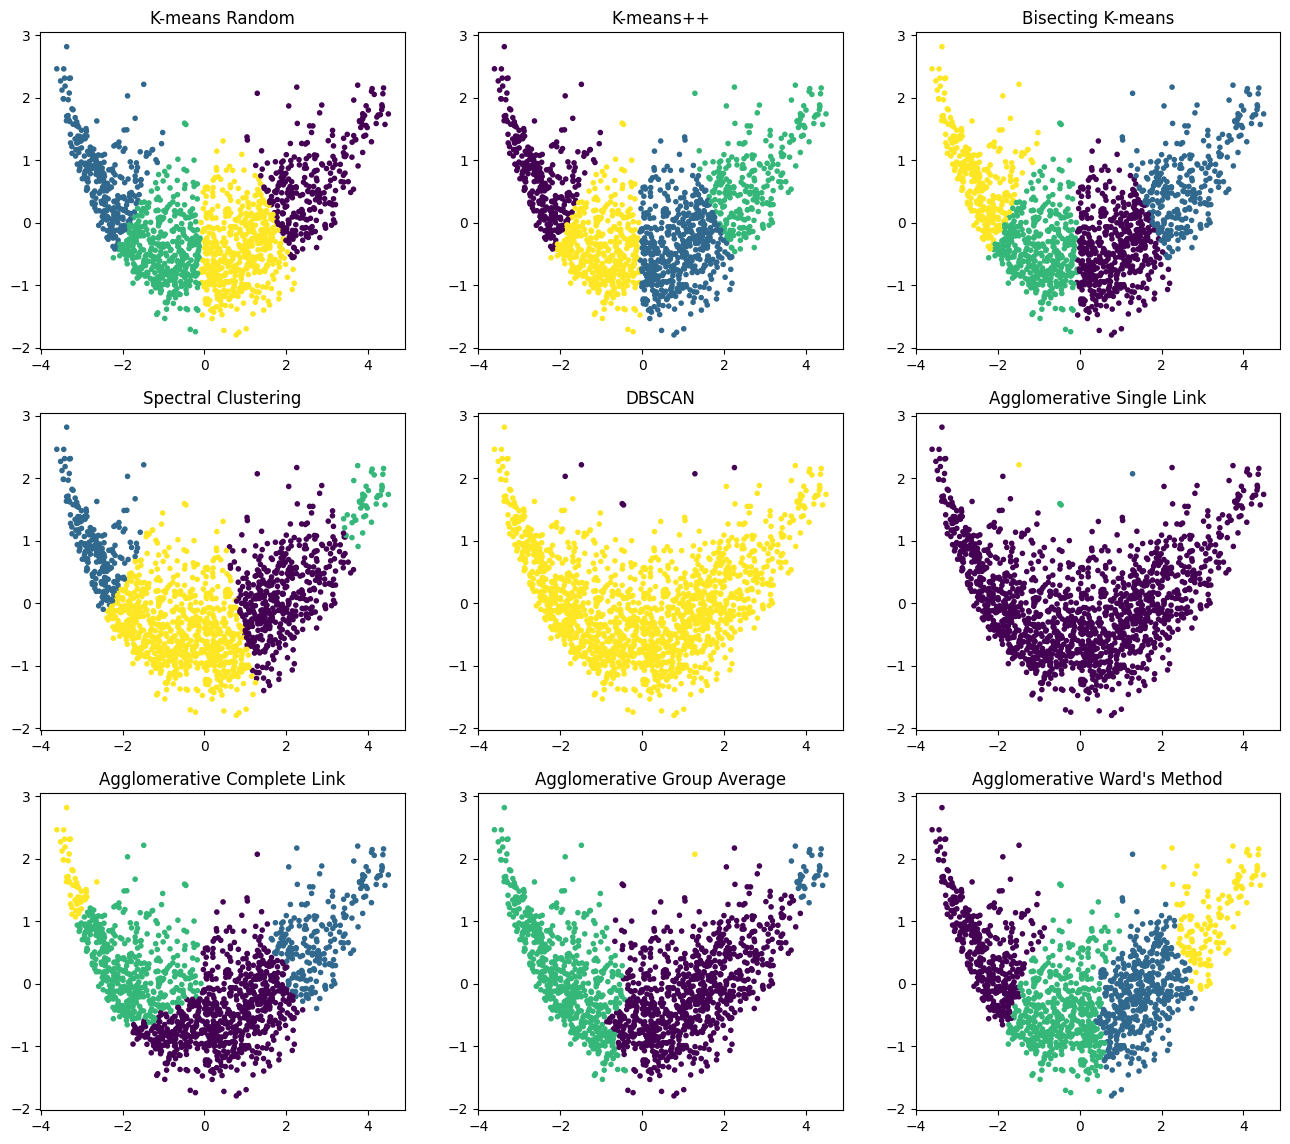

In [ ]:
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN, BisectingKMeans
import matplotlib.pyplot as plt

# K-means clustering with init = 'Random'
kmeans_random = KMeans(n_clusters=4, init='random')
kmeans_random.fit(reduced_features)
kmeans_random_labels = kmeans_random.labels_

# K-means clustering with init = 'k-means++'
kmeans_pp = KMeans(n_clusters=4, init='k-means++')
kmeans_pp.fit(reduced_features)
kmeans_pp_labels = kmeans_pp.labels_

# Bisecting K-means with init = 'Random'
bisecting_kmeans = BisectingKMeans(n_clusters=4, init='random')
bisecting_kmeans.fit(reduced_features)
bisecting_kmeans_labels = bisecting_kmeans.labels_

# Spectral clustering
spectral_clustering = SpectralClustering(n_clusters=4)
spectral_clustering.fit(reduced_features)
spectral_labels = spectral_clustering.labels_

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(reduced_features)

# Agglomerative clustering
agglomerative_single = AgglomerativeClustering(n_clusters=4, linkage='single')
agglomerative_single_labels = agglomerative_single.fit_predict(reduced_features)

agglomerative_complete = AgglomerativeClustering(n_clusters=4, linkage='complete')
agglomerative_complete_labels = agglomerative_complete.fit_predict(reduced_features)

agglomerative_average = AgglomerativeClustering(n_clusters=4, linkage='average')
agglomerative_average_labels = agglomerative_average.fit_predict(reduced_features)

agglomerative_ward = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglomerative_ward_labels = agglomerative_ward.fit_predict(reduced_features)

# Visualize clustering results
plt.figure(figsize=(16, 14))

plt.subplot(3, 3, 1)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans_random_labels, cmap='viridis', marker='.')
plt.title('K-means Random')

plt.subplot(3, 3, 2)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans_pp_labels, cmap='viridis', marker='.')
plt.title('K-means++')

plt.subplot(3, 3, 3)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=bisecting_kmeans_labels, cmap='viridis', marker='.')
plt.title('Bisecting K-means')

plt.subplot(3, 3, 4)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=spectral_labels, cmap='viridis', marker='.')
plt.title('Spectral Clustering')

plt.subplot(3, 3, 5)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=dbscan_labels, cmap='viridis', marker='.')
plt.title('DBSCAN')

plt.subplot(3, 3, 6)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=agglomerative_single_labels, cmap='viridis', marker='.')
plt.title('Agglomerative Single Link')

plt.subplot(3, 3, 7)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=agglomerative_complete_labels, cmap='viridis', marker='.')
plt.title('Agglomerative Complete Link')

plt.subplot(3, 3, 8)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=agglomerative_average_labels, cmap='viridis', marker='.')
plt.title('Agglomerative Group Average')

plt.subplot(3, 3, 9)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=agglomerative_ward_labels, cmap='viridis', marker='.')
plt.title("Agglomerative Ward's Method")

plt.show()


Part (4) - Clustering Evaluation

In [ ]:
from sklearn.metrics import fowlkes_mallows_score, silhouette_score

# Calculate Fowlkes-Mallows index for each clustering method
fm_scores = {
    'K-means Random': fowlkes_mallows_score(labels, kmeans_random_labels),
    'K-means++': fowlkes_mallows_score(labels, kmeans_pp_labels),
    'Bisecting K-means': fowlkes_mallows_score(labels, bisecting_kmeans_labels),
    'Spectral Clustering': fowlkes_mallows_score(labels, spectral_labels),
    'DBSCAN': fowlkes_mallows_score(labels, dbscan_labels),
    'Agglomerative Single Link': fowlkes_mallows_score(labels, agglomerative_single_labels),
    'Agglomerative Complete Link': fowlkes_mallows_score(labels, agglomerative_complete_labels),
    'Agglomerative Group Average': fowlkes_mallows_score(labels, agglomerative_average_labels),
    "Agglomerative Ward's Method": fowlkes_mallows_score(labels, agglomerative_ward_labels)
}

# Calculate Silhouette Coefficient for each clustering method
silhouette_scores = {
    'K-means Random': silhouette_score(reduced_features, kmeans_random_labels),
    'K-means++': silhouette_score(reduced_features, kmeans_pp_labels),
    'Bisecting K-means': silhouette_score(reduced_features, bisecting_kmeans_labels),
    'Spectral Clustering': silhouette_score(reduced_features, spectral_labels),
    'DBSCAN': silhouette_score(reduced_features, dbscan_labels),
    'Agglomerative Single Link': silhouette_score(reduced_features, agglomerative_single_labels),
    'Agglomerative Complete Link': silhouette_score(reduced_features, agglomerative_complete_labels),
    'Agglomerative Group Average': silhouette_score(reduced_features, agglomerative_average_labels),
    "Agglomerative Ward's Method": silhouette_score(reduced_features, agglomerative_ward_labels)
}

# Rank methods based on Fowlkes-Mallows index
fm_ranking = sorted(fm_scores.items(), key=lambda x: x[1], reverse=True)

# Rank methods based on Silhouette Coefficient
silhouette_ranking = sorted(silhouette_scores.items(), key=lambda x: x[1], reverse=True)

# Print Fowlkes-Mallows index scores and ranking
print("Fowlkes-Mallows Index Scores:")
for method, score in fm_ranking:
    print(f"{method}: {score}")

print("\nFowlkes-Mallows Index Ranking:")
for i, (method, _) in enumerate(fm_ranking):
    print(f"{i+1}. {method}")

# Print Silhouette Coefficient scores and ranking
print("\nSilhouette Coefficient Scores:")
for method, score in silhouette_ranking:
    print(f"{method}: {score}")

print("\nSilhouette Coefficient Ranking:")
for i, (method, _) in enumerate(silhouette_ranking):
    print(f"{i+1}. {method}")


Fowlkes-Mallows Index Scores:
Agglomerative Single Link: 0.5055481501515705
DBSCAN: 0.5051407975485699
Agglomerative Group Average: 0.3876333497449927
Spectral Clustering: 0.33639066681407975
Agglomerative Complete Link: 0.33151889603751467
Agglomerative Ward's Method: 0.3043791983959531
K-means++: 0.291870636677447
K-means Random: 0.29053456336860745
Bisecting K-means: 0.29023798531153105

Fowlkes-Mallows Index Ranking:
1. Agglomerative Single Link
2. DBSCAN
3. Agglomerative Group Average
4. Spectral Clustering
5. Agglomerative Complete Link
6. Agglomerative Ward's Method
7. K-means++
8. K-means Random
9. Bisecting K-means

Silhouette Coefficient Scores:
Agglomerative Ward's Method: 0.4126675814951608
K-means++: 0.4116244844826236
K-means Random: 0.41023823151602073
Bisecting K-means: 0.41006560052039276
Spectral Clustering: 0.37828098880963373
Agglomerative Group Average: 0.3720731053245915
Agglomerative Complete Link: 0.3322782846272788
DBSCAN: 0.19903103161137592
Agglomerative Sing